In [49]:
import matplotlib
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [24, 12]
#https://timodenk.com/blog/exporting-matplotlib-plots-to-latex/
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
})


In [50]:
timings={}
memory_usage={}
disease_stats={}
versions=["v1.3","v1.5","v1.6","v1.6_copy"]
directory="york_stats_results/"
#directory="v1.6/2013265923TYPE299/"
for version in versions:
    with open(directory+version+"/timings.json") as file:
        data=json.load(file)
        size=len(data)+1
        total=[0 for i in range(size)]
        gen_exposures=[0 for i in range(size)]
        apply_exposures=[0 for i in range(size)]
        apply_interventions=[0 for i in range(size)]

        for index,entry in enumerate(data):
            total[index]=entry["total"]
            gen_exposures[index]=entry["Generate Exposures"]
            apply_exposures[index]=entry["Apply Exposures"]
            apply_interventions[index]=entry["Apply Interventions"]
        timings[version]={"Total":total,"Generate Exposures":gen_exposures,"Apply Exposures":apply_exposures,"Apply Interventions":apply_interventions}
    with open(directory+version+"/memory.json") as file:
        data=json.load(file)
        data=list(map(lambda entry:float(entry.split(" ")[0]),data))
        memory_usage[version]=data
    with open(directory+version+"/global_stats.json") as file:
        data=json.load(file)
        size = len(data)+1
        susceptible = [0 for i in range(size)]
        exposed = [0 for i in range(size)]
        infected = [0 for i in range(size)]
        removed = [0 for i in range(size)]
        vaccinated = [0 for i in range(size)]
        for entry in data:
            susceptible[entry["time_step"]] = entry["susceptible"]
            exposed[entry["time_step"]] = entry["exposed"]
            infected[entry["time_step"]] = entry["infected"]
            removed[entry["time_step"]] = entry["recovered"]
            vaccinated[entry["time_step"]] = entry["vaccinated"]
        disease_stats[version]={"susceptible": susceptible, "exposed": exposed, "infected": infected, "removed": removed,
                             "vaccinated": vaccinated}

In [51]:
# Pad All the data so matplot doesn't have a fit
size=0
for data in timings.values():
    for sub_data in data.values():
        size=max(len(sub_data),size)
size=1428
for  version_data in timings.values():
    for  data in version_data.values():
        data.extend([0 for i in range(size-len(data))])

size=0
for data in memory_usage.values():
    size=max(len(sub_data),size)
size=1428
for version_data in memory_usage.values():
    print(len(version_data),)
    version_data.extend([version_data[-1] for i in range(size-len(version_data))])
    print("\t",len(version_data))


# Pad All the data so matplot doesn't have a fit
size=1428
for data in disease_stats.values():
    for sub_data in data.values():
        size=max(len(sub_data),size)
for  version_data in disease_stats.values():
    for  data in version_data.values():
        data.extend([0 for i in range(size-len(data))])




791
	 1428
874
	 1428
1426
	 1428
1210
	 1428


Version Name		 Function Name        		 Mean (ms) 		STD (ms)
Base                     		& Total                		& 57.832   		& 85.872 \\
Threading                		& Total                		& 32.827   		& 48.388 \\
Threading + Vectors      		& Total                		& 29.377   		& 15.117 \\
\hline
Base                     		& Generate Exposures   		& 17.933   		& 23.962 \\
Threading                		& Generate Exposures   		& 26.661   		& 43.356 \\
Threading + Vectors      		& Generate Exposures   		& 22.597   		& 11.173 \\
\hline
Base                     		& Apply Exposures      		& 39.858   		& 66.588 \\
Threading                		& Apply Exposures      		& 5.005    		& 6.809 \\
Threading + Vectors      		& Apply Exposures      		& 5.693    		& 5.382 \\
\hline
Base                     		& Apply Interventions  		& 0.037    		& 0.644 \\
Threading                		& Apply Interventions  		& 1.158    		& 1.668 \\
Threading + Vectors      		& Apply Interventions  		& 1.083    		& 1.378 \\


Text(0.5, 0.98, 'Disease Stats Per Time Step')

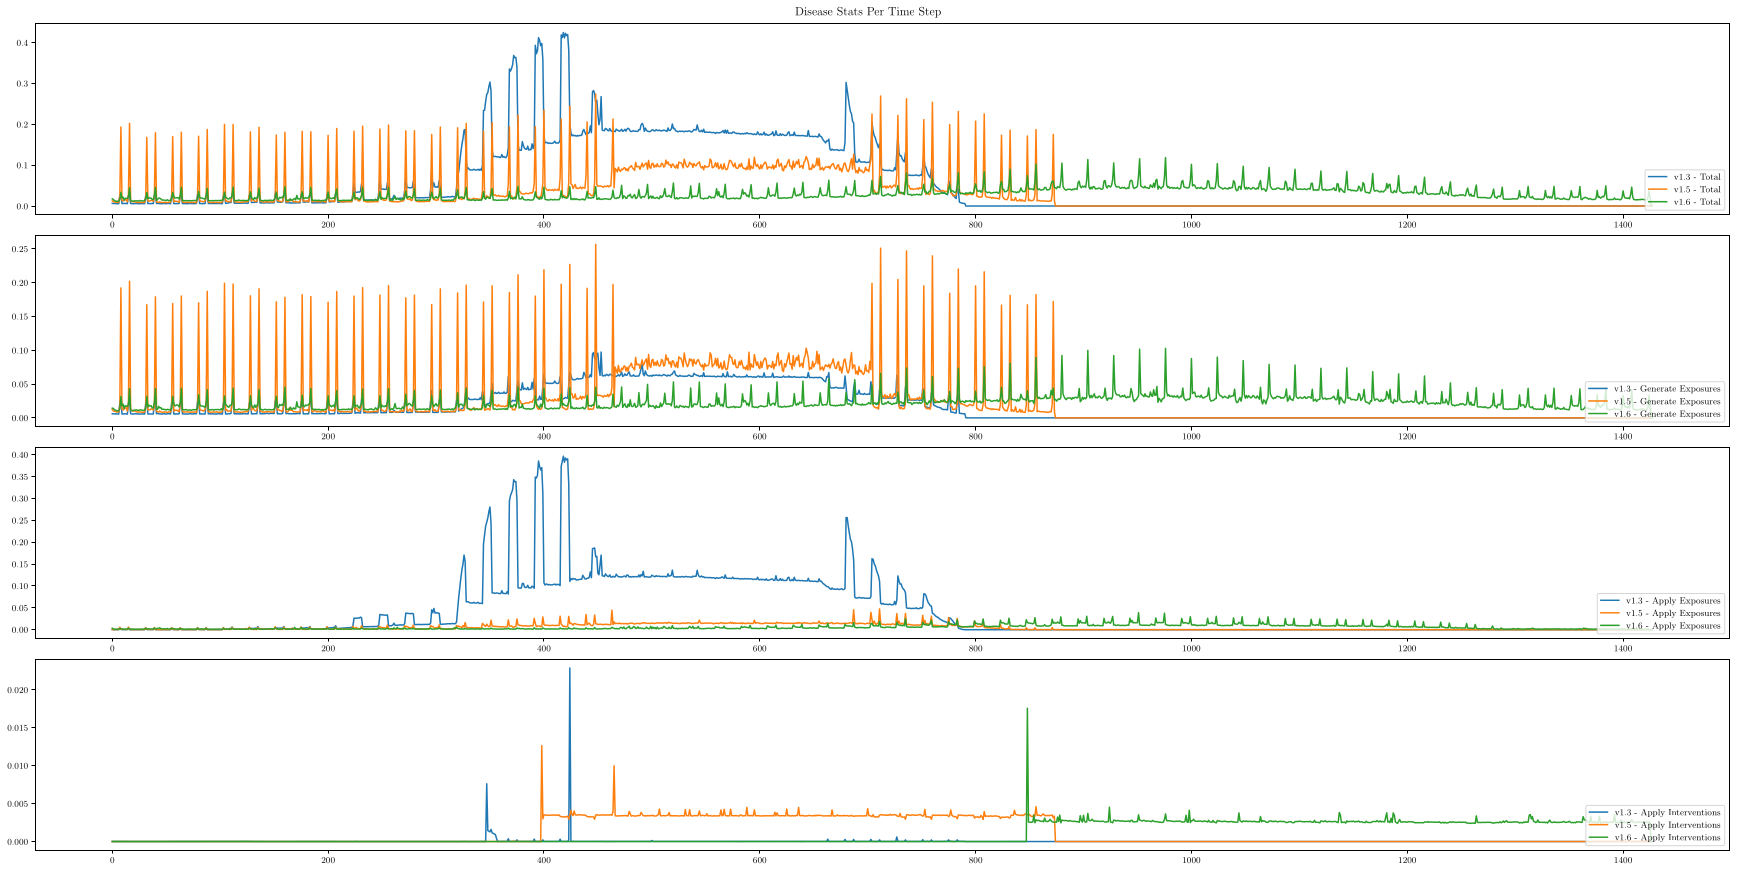

In [52]:
fig,axes=plt.subplots(len(timings[list(timings.keys())[0]].keys()),constrained_layout=True)
print("Version Name\t\t","Function Name".ljust(20),"\t\t","Mean (ms)".ljust(8),"\t\tSTD (ms)")
#"\t\t","Median (ms)".ljust(8),
for index,function_name in enumerate(timings[list(timings.keys())[0]].keys()):
    for pretty_name,(version_name,version_data) in zip(["Base","Threading","Threading + Vectors",""],timings.items()):
        if pretty_name=="":
            continue
        axes[index].plot(range(0,size),version_data[function_name],label=version_name+" - "+function_name)
        axes[index].legend(loc="lower right")
        sorted_data=sorted(list(version_data[function_name]))
        #print(version_name," - ",function_name,", Median: ",np.median(sorted_data)*1000,"ms, Std: ",np.std(sorted_data)*1000,"ms")
        #("%.3f" % (np.median(sorted_data)*1000)).ljust(8),"\t\t&",
        print(pretty_name.ljust(24),"\t\t&",function_name.ljust(20),"\t\t&",("%.3f" % (np.mean(sorted_data)*1000)).ljust(8),"\t\t&",("%.3f" % (np.std(sorted_data)*1000)),"\\\\")
    print("\hline")
fig.suptitle("Disease Stats Per Time Step")



Version Name		 Function Name        		 Mean (ms) 		STD (ms)


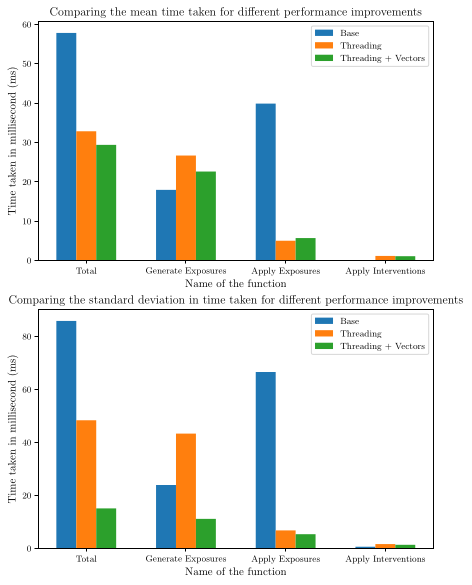

In [58]:
fig,axes=plt.subplots(2,constrained_layout=True)
fig.set_size_inches(6,8)
print("Version Name\t\t","Function Name".ljust(20),"\t\t","Mean (ms)".ljust(8),"\t\tSTD (ms)")
#"\t\t","Median (ms)".ljust(8),
colours=["tab:blue","tab:orange","tab:green"]
for index,function_name in enumerate(timings[list(timings.keys())[0]].keys()):
    for sub_index,(pretty_name,(version_name,version_data)) in enumerate(zip(["Base","Threading","Threading + Vectors",""],timings.items())):
        if pretty_name=="":
            continue

        sorted_data=sorted(list(version_data[function_name]))
        #print(version_name," - ",function_name,", Median: ",np.median(sorted_data)*1000,"ms, Std: ",np.std(sorted_data)*1000,"ms")
        #("%.3f" % (np.median(sorted_data)*1000)).ljust(8),"\t\t&",
        #print(pretty_name.ljust(24),"\t\t&",function_name.ljust(20),"\t\t&",("%.3f" % (np.mean(sorted_data)*1000)).ljust(8),"\t\t&",("%.3f" % (np.std(sorted_data)*1000)),"\\\\")
        if index==0:
            axes[0].bar(index+(sub_index*0.2),(np.mean(sorted_data)*1000),0.2,label=pretty_name,color=colours[sub_index])
            axes[1].bar(index+(sub_index*0.2),(np.std(sorted_data)*1000),0.2,label=pretty_name,color=colours[sub_index])
        else:
            axes[0].bar(index+(sub_index*0.2),(np.mean(sorted_data)*1000),0.2,color=colours[sub_index])
            axes[1].bar(index+(sub_index*0.2),(np.std(sorted_data)*1000),0.2,color=colours[sub_index])
axes[0].set_title("Comparing the mean time taken for different performance improvements")
axes[1].set_title("Comparing the standard deviation in time taken for different performance improvements")
axes[0].set_ylabel("Time taken in millisecond (ms)")
axes[1].set_ylabel("Time taken in millisecond (ms)")
axes[0].set_xlabel("Name of the function")
axes[1].set_xlabel("Name of the function")
axes[0].set_xticks([0.2,1.2,2.2,3.2],["Total","Generate Exposures","Apply Exposures","Apply Interventions"])
axes[1].set_xticks([0.2,1.2,2.2,3.2],["Total","Generate Exposures","Apply Exposures","Apply Interventions"])

axes[0].legend()
axes[1].legend()
        #axes[index].plot(range(0,size),version_data[function_name],label=pretty_name+" - "+function_name)
        #axes[index].legend(loc="lower right")
#fig.suptitle("Disease Stats Per Time Step")

plt.savefig("performance_summary.pdf",format="pdf")

Text(0.5, 0.98, 'Memory Usage in GB per time step')

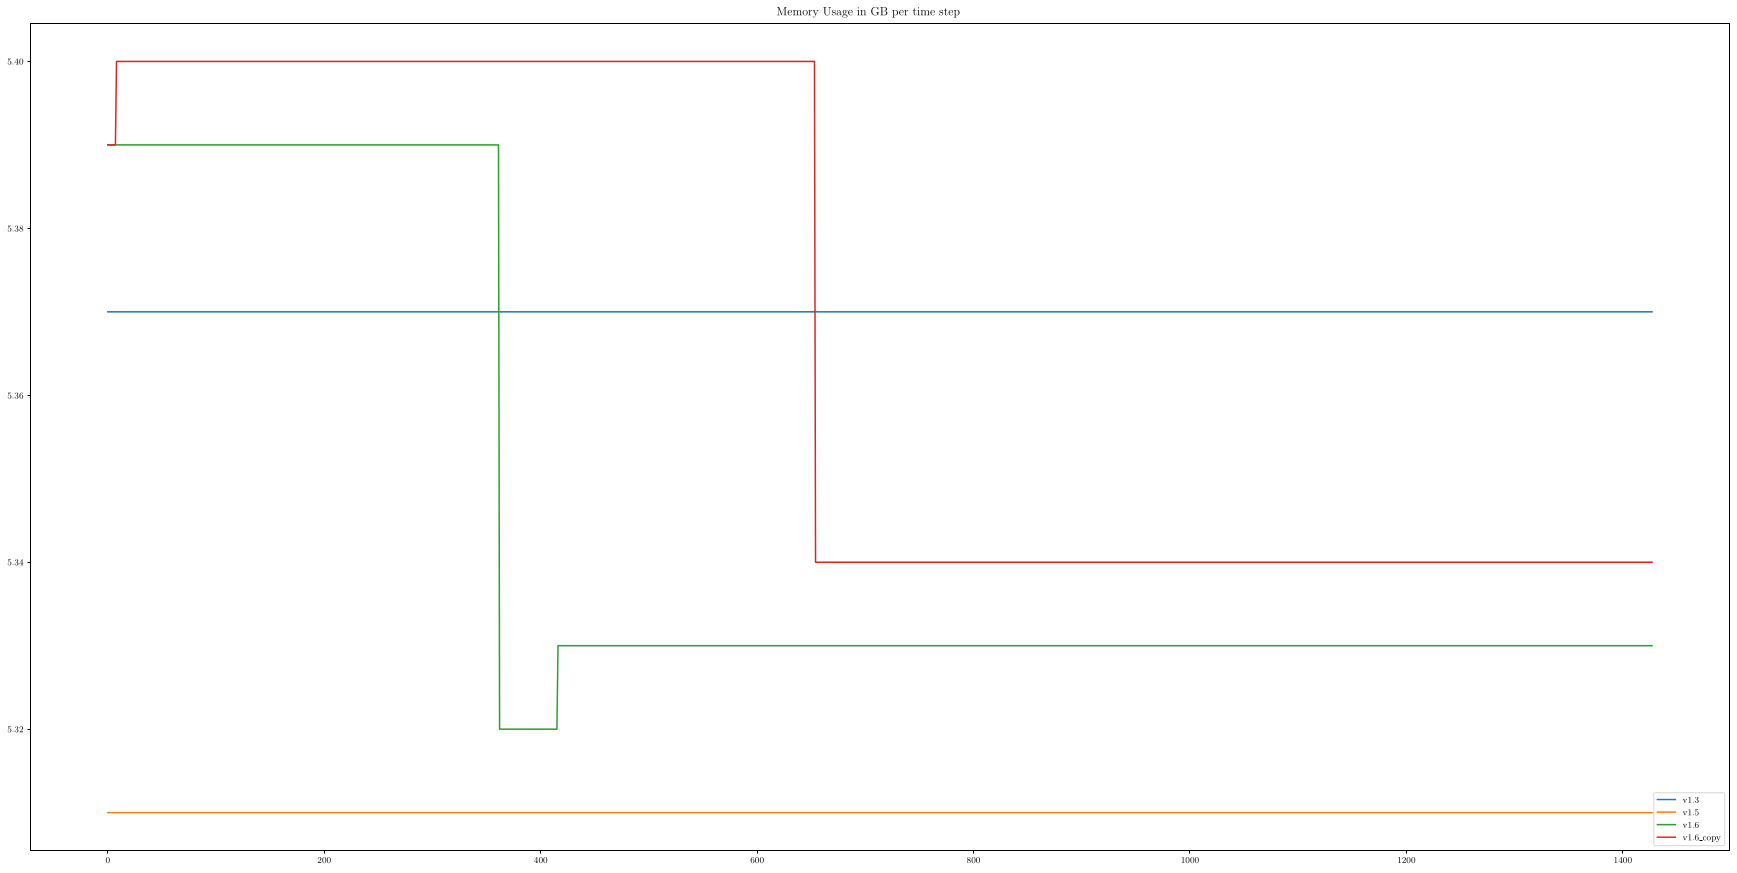

In [54]:
fig,axes=plt.subplots(constrained_layout=True)
for version_name,version_data in memory_usage.items():
    axes.plot(range(0,size),version_data,label=version_name)
    axes.legend(loc="lower right")
fig.suptitle("Memory Usage in GB per time step")

Text(0.5, 0.98, 'Disease Stats Per Time Step')

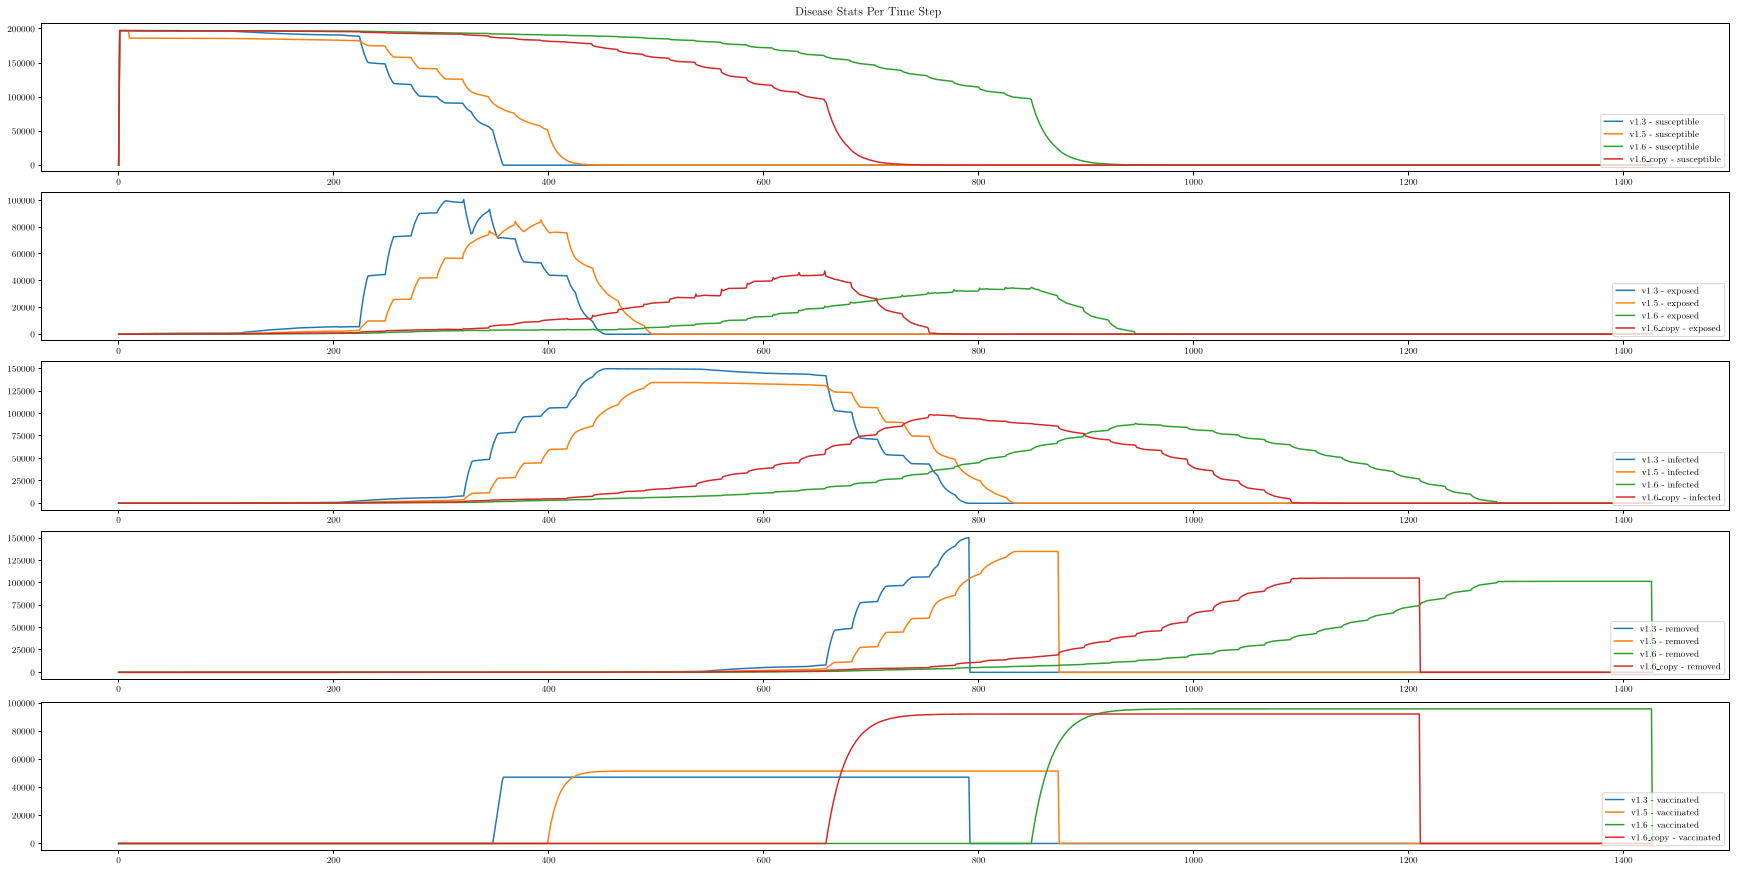

In [55]:
fig,axes=plt.subplots(len(disease_stats[list(disease_stats.keys())[0]].keys()),constrained_layout=True)
for index,function_name in enumerate(disease_stats[list(disease_stats.keys())[0]].keys()):
    for version_name,version_data in disease_stats.items():
        axes[index].plot(range(0,size),version_data[function_name],label=version_name+" - "+function_name)
        axes[index].legend(loc="lower right")
fig.suptitle("Disease Stats Per Time Step")